In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Data import

In [2]:
titanic_df = pd.read_csv(r'C:\Users\Sergii\Desktop\titanic.csv')

### Data preparation
#### Data overview

In [3]:
print(titanic_df.columns.values)

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest']


In [4]:
print(titanic_df.head())

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [5]:
print(titanic_df.tail())

      pclass  survived                       name     sex   age  sibsp  parch  \
1305     3.0       0.0      Zabour, Miss. Thamine  female   NaN    1.0    0.0   
1306     3.0       0.0  Zakarian, Mr. Mapriededer    male  26.5    0.0    0.0   
1307     3.0       0.0        Zakarian, Mr. Ortin    male  27.0    0.0    0.0   
1308     3.0       0.0         Zimmerman, Mr. Leo    male  29.0    0.0    0.0   
1309     NaN       NaN                        NaN     NaN   NaN    NaN    NaN   

      ticket     fare cabin embarked boat   body home.dest  
1305    2665  14.4542   NaN        C  NaN    NaN       NaN  
1306    2656   7.2250   NaN        C  NaN  304.0       NaN  
1307    2670   7.2250   NaN        C  NaN    NaN       NaN  
1308  315082   7.8750   NaN        S  NaN    NaN       NaN  
1309     NaN      NaN   NaN      NaN  NaN    NaN       NaN  


In [6]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB
None


In [7]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
titanic_df.describe(include=['O'])

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


#### Columns

In [9]:
titanic_df.rename(columns={'pclass':'class', 'sibsp':'siblings_spouses', 'parch':'parents_children'}, inplace = True)
titanic_df.columns = titanic_df.columns.str.replace('.', '_', regex=True)

<AxesSubplot: >

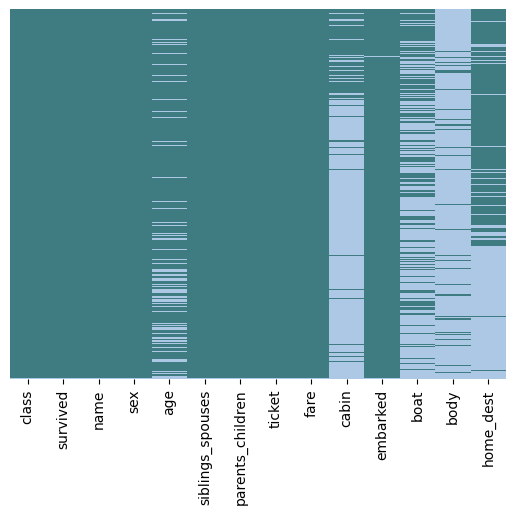

In [10]:
sns.heatmap(data=titanic_df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap=['#3E7C82', '#ACC8E5'])

In [11]:
titanic_df = titanic_df.drop(['cabin', 'body', 'home_dest'], axis=1)

#### Missing data

In [12]:
titanic_df = titanic_df.dropna(how='all')

#### Data types

In [13]:
titanic_df['class'] = titanic_df['class'].astype(int)
titanic_df['survived'] = titanic_df['survived'].astype(int)
titanic_df['siblings_spouses'] = titanic_df['siblings_spouses'].astype(int)
titanic_df['parents_children'] = titanic_df['parents_children'].astype(int)

#### Data manipulation

In [14]:
titanic_df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [15]:
titanic_df['embarked'] = np.where(titanic_df['embarked']=='C', 'Cherbourg',
                         np.where(titanic_df['embarked']=='Q', 'Queenstown',
                         np.where(titanic_df['embarked']=='S', 'Southampton', None)))

#### Final data overview

In [16]:
print(titanic_df.columns.values)

['class' 'survived' 'name' 'sex' 'age' 'siblings_spouses'
 'parents_children' 'ticket' 'fare' 'embarked' 'boat']


In [17]:
print(titanic_df.head())

   class  survived                                             name     sex  \
0      1         1                    Allen, Miss. Elisabeth Walton  female   
1      1         1                   Allison, Master. Hudson Trevor    male   
2      1         0                     Allison, Miss. Helen Loraine  female   
3      1         0             Allison, Mr. Hudson Joshua Creighton    male   
4      1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  siblings_spouses  parents_children  ticket      fare     embarked  \
0  29.0000                 0                 0   24160  211.3375  Southampton   
1   0.9167                 1                 2  113781  151.5500  Southampton   
2   2.0000                 1                 2  113781  151.5500  Southampton   
3  30.0000                 1                 2  113781  151.5500  Southampton   
4  25.0000                 1                 2  113781  151.5500  Southampton   

  boat  
0    2  
1   11  
2  NaN  
3 

In [18]:
print(titanic_df.tail())

      class  survived                       name     sex   age  \
1304      3         0       Zabour, Miss. Hileni  female  14.5   
1305      3         0      Zabour, Miss. Thamine  female   NaN   
1306      3         0  Zakarian, Mr. Mapriededer    male  26.5   
1307      3         0        Zakarian, Mr. Ortin    male  27.0   
1308      3         0         Zimmerman, Mr. Leo    male  29.0   

      siblings_spouses  parents_children  ticket     fare     embarked boat  
1304                 1                 0    2665  14.4542    Cherbourg  NaN  
1305                 1                 0    2665  14.4542    Cherbourg  NaN  
1306                 0                 0    2656   7.2250    Cherbourg  NaN  
1307                 0                 0    2670   7.2250    Cherbourg  NaN  
1308                 0                 0  315082   7.8750  Southampton  NaN  


In [19]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   class             1309 non-null   int32  
 1   survived          1309 non-null   int32  
 2   name              1309 non-null   object 
 3   sex               1309 non-null   object 
 4   age               1046 non-null   float64
 5   siblings_spouses  1309 non-null   int32  
 6   parents_children  1309 non-null   int32  
 7   ticket            1309 non-null   object 
 8   fare              1308 non-null   float64
 9   embarked          1307 non-null   object 
 10  boat              486 non-null    object 
dtypes: float64(2), int32(4), object(5)
memory usage: 102.3+ KB
None


### Exploratory data analysis

In [20]:
titanic_df.groupby(['survived'], as_index=False)['survived'].count()

,survived
0,809
1,500


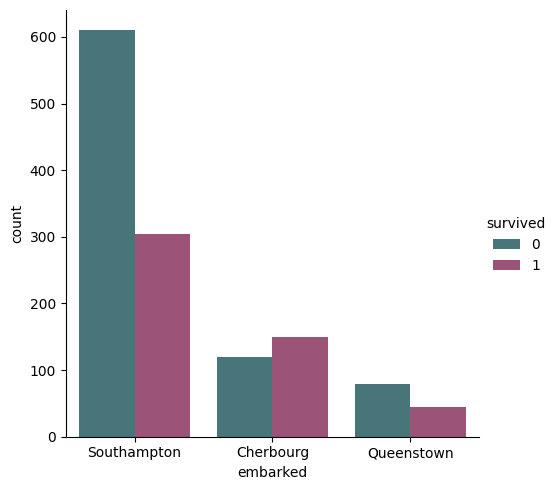

In [21]:
plot2 = sns.catplot(data=titanic_df[~titanic_df['embarked'].isna()], 
                    x='embarked', 
                    hue='survived', 
                    kind='count', 
                    palette=['#3E7C82', '#A74779'])

In [22]:
t1 = titanic_df[['sex', 'class', 'survived']].groupby(['sex'], as_index=False).agg({'class':'count',
                                                                                   'survived':'sum'})
t1.rename(columns={'class':'passengers',
                   'survived':'survived_passengers'}, inplace = True)
t1['share_passengers'] = t1['passengers']/np.sum(t1['passengers'])
t1['share_survived_passengers'] = t1['survived_passengers']/np.sum(t1['survived_passengers'])
t1

,sex,passengers,survived_passengers,share_passengers,share_survived_passengers
0,female,466,339,0.355997,0.678
1,male,843,161,0.644003,0.322


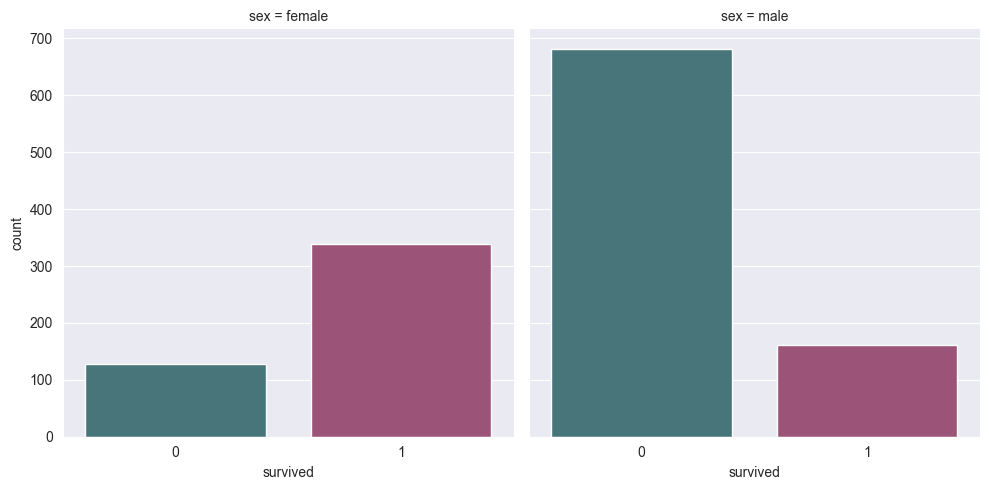

In [23]:
sns.set_style("darkgrid")
plot = sns.catplot(data=titanic_df, 
                   x='survived', 
                   kind='count', 
                   col='sex', 
                   palette=['#3E7C82', '#A74779'])

In [24]:
titanic_df[['sex', 'survived']].groupby(['sex'], as_index=False).mean()

,sex,survived
0,female,0.727468
1,male,0.190985


In [25]:
t2 = titanic_df[['embarked', 'class', 'survived']].groupby(['embarked'], as_index=False).agg({'class':'count',
                                                                                              'survived':'sum'})
t2.rename(columns={'class':'passengers',
                   'survived':'survived_passengers'}, inplace=True)
t2['share_passengers'] = t2['passengers']/np.sum(t2['passengers'])
t2['share_survived_passengers'] = t2['survived_passengers']/np.sum(t2['survived_passengers'])
t2.sort_values(by='passengers', ascending=False)

,embarked,passengers,survived_passengers,share_passengers,share_survived_passengers
2,Southampton,914,304,0.699311,0.610442
0,Cherbourg,270,150,0.206580,0.301205
1,Queenstown,123,44,0.094109,0.088353


In [26]:
titanic_df[['embarked', 'class', 'name', 'survived']]. \
    groupby(['embarked', 'class'], as_index=False). \
    agg({'name':'count', 'survived':'sum'}). \
    rename(columns={'name':'passengers'}). \
    sort_values(by=['class', 'passengers'], ascending=[True, False], na_position='first')

,embarked,class,passengers,survived
6,Southampton,1,177,99
0,Cherbourg,1,141,97
3,Queenstown,1,3,2
7,Southampton,2,242,101
1,Cherbourg,2,28,16
4,Queenstown,2,7,2
8,Southampton,3,495,104
5,Queenstown,3,113,40
2,Cherbourg,3,101,37


In [27]:
titanic_df['age_range'] = np.where(titanic_df['age'] <= 10, '0 - 10 years',
                          np.where(titanic_df['age'] <= 20, '11 - 20 years',
                          np.where(titanic_df['age'] <= 30, '21 - 30 years',
                          np.where(titanic_df['age'] <= 40, '31 - 40 years',
                          np.where(titanic_df['age'] <= 50, '41 - 50 years',
                          np.where(titanic_df['age'] <= 60, '51 - 60 years',
                          np.where(titanic_df['age'] <= 70, '61 - 70 years',
                          np.where(titanic_df['age'] <= 80, '71 - 80 years', None))))))))

t3 = pd.DataFrame()
t3['age_range'] = titanic_df['age_range']
t3['passengers'] = np.ones((t3['age_range'].shape[0],), dtype=int)
t3['survived_passengers'] = titanic_df['survived']
t3 = t3.groupby(['age_range'], as_index=False).agg({'passengers':'count',
                                               'survived_passengers':'sum'})
t3['share'] = t3['survived_passengers']/t3['passengers']
t3['sort'] = t3['age_range'].str[:2].str.strip().replace('na', np.nan).astype(float)
t3.sort_values(by='sort', ascending=True).drop(['sort'], axis=1)

,age_range,passengers,survived_passengers,share
0,0 - 10 years,86,50,0.581395
1,11 - 20 years,162,64,0.395062
2,21 - 30 years,361,134,0.371191
3,31 - 40 years,210,89,0.423810
4,41 - 50 years,132,52,0.393939
5,51 - 60 years,62,30,0.483871
6,61 - 70 years,27,6,0.222222
7,71 - 80 years,6,2,0.333333


([<matplotlib.axis.XTick at 0x1c6ef2d7970>,
 [Text(-250, 0, '250'),
  Text(-200, 0, '200'),
  Text(-150, 0, '150'),
  Text(-100, 0, '100'),
  Text(-50, 0, '50'),
  Text(0, 0, '0'),
  Text(50, 0, '50'),
  Text(100, 0, '100'),
  Text(150, 0, '150'),
  Text(200, 0, '200'),
  Text(250, 0, '250')])

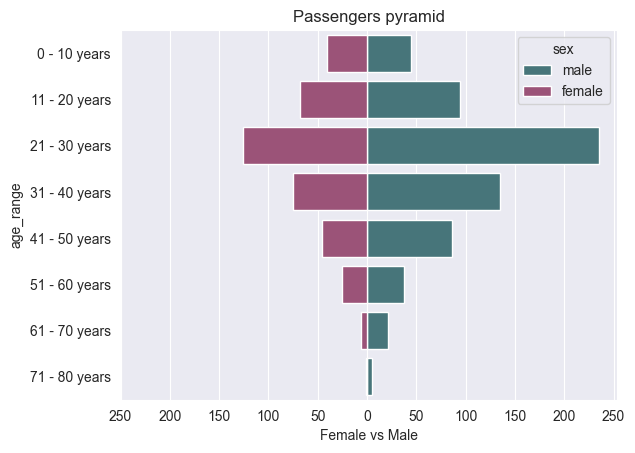

In [28]:
t4 = pd.DataFrame()
t4 = titanic_df[['age_range', 'sex']].groupby(['age_range', 'sex'], as_index=False)['sex'].count(). \
    rename(columns={'sex':'count'})
t4['sex'] = ['female', 'male']*8
t4['count'] = np.where(t4['sex']=='male', t4['count'], t4['count']*(-1))

sns.barplot(x='count',
            y='age_range',
            data=t4[t4['sex']=='male'],
            hue='sex',
            palette=['#3E7C82'])
sns.barplot(x='count',
            y='age_range',
            data=t4[t4['sex']=='female'],
            hue='sex',
           palette=['#A74779'])

plt.title("Passengers pyramid")
plt.xlabel("Female vs Male")
plt.xticks(ticks=[i*50 for i in range(-5, 6)],
           labels=[i*(-50) if i < 0 else i*50 for i in range(-5, 6)])

In [29]:
titanic_df[['class', 'fare', 'survived']].groupby(['class'], as_index=False).mean().sort_values(by='class')

,class,fare,survived
0,1,87.508992,0.619195
1,2,21.179196,0.429603
2,3,13.302889,0.255289


In [30]:
np.max(titanic_df['fare']) / np.min(titanic_df[titanic_df['fare']>0]['fare'])

161.57726756654472

In [31]:
titanic_df[['class', 'sex', 'age', 'fare']].groupby(['class', 'sex'], as_index=False).mean().sort_values(by='class')

,class,sex,age,fare
0,1,female,37.037594,109.412385
1,1,male,41.029250,69.888385
2,2,female,27.499191,23.234827
3,2,male,30.815401,19.904946
4,3,female,22.185307,15.324250
5,3,male,25.962273,12.415462


In [32]:
titanic_df[['class', 'age']].groupby(['class'], as_index=False).agg(
    min_age=('age', np.min),
    max_age=('age', np.max))

,class,min_age,max_age
0,1,0.9167,80.0
1,2,0.6667,70.0
2,3,0.1667,74.0


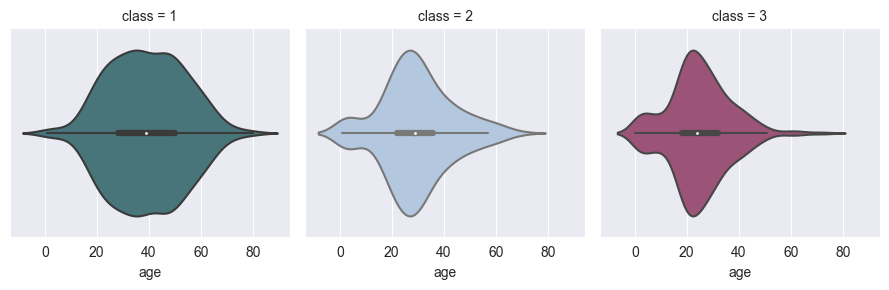

In [33]:
g = sns.FacetGrid(titanic_df, col="class", hue='class', palette=['#3E7C82', '#ACC8E5', '#A74779'])
g.map(sns.violinplot, 'age', order='class')

In [34]:
titanic_df[titanic_df['fare']>0][['class', 'fare']].groupby(['class'], as_index=False).agg(
    min_fare=('fare', np.min),
    max_fare=('fare', np.max))

,class,min_fare,max_fare
0,1,5.0000,512.3292
1,2,9.6875,73.5000
2,3,3.1708,69.5500


In [35]:
titanic_df['title'] = titanic_df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(
    titanic_df['title'],
    titanic_df['sex'],
    margins=True, margins_name='Total',
    colnames=['title'])

title,female,male,Total
title,,,
Capt,0,1,1
Col,0,4,4
Countess,1,0,1
Don,0,1,1
Dona,1,0,1
Dr,1,7,8
Jonkheer,0,1,1
Lady,1,0,1
Major,0,2,2


In [36]:
rare_titles_df = titanic_df[['title', 'name']].groupby(['title'], as_index=False).count()
rare_titles = rare_titles_df[rare_titles_df['name'] < 10]['title']

for rare_title in rare_titles:
    titanic_df['title'] = titanic_df['title'].replace(rare_title, 'Rare')

titanic_df['title'] = titanic_df['title'].replace('Mme', 'Mrs')
titanic_df['title'] = titanic_df['title'].replace('Mlle', 'Miss')
titanic_df['title'] = titanic_df['title'].replace('Ms', 'Miss')

grouped_title = titanic_df[['title', 'survived']].groupby(['title'], as_index=False)['survived'].mean()
grouped_title

,title,survived
0,Master,0.508197
1,Miss,0.676923
2,Mr,0.162483
3,Mrs,0.786802
4,Rare,0.441176


Text(0, 0.5, 'survived vs passengers, %')

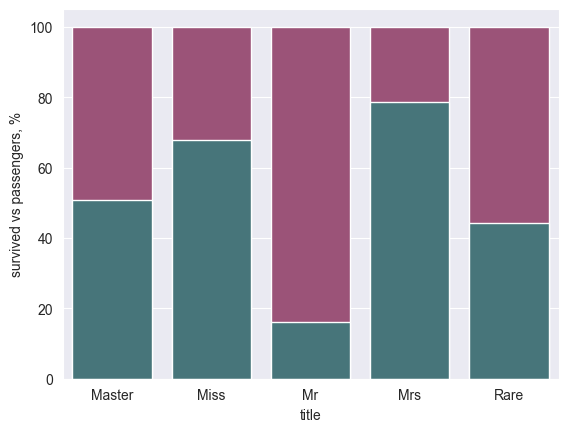

In [37]:
grouped_title['survived'] = (grouped_title['survived']*100)

sns.barplot(data=grouped_title,
            x='title',
            y=[100 for i in range(grouped_title.shape[0])],
            color='#A74779')
sns.barplot(data=grouped_title,
            x='title',
            y='survived',
            color='#3E7C82')
plt.ylabel('survived vs passengers, %')

C:\Users\Sergii\AppData\Local\Temp\ipykernel_1820\295710001.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=titanic_df.corr(), vmin=-1, vmax=1, cmap=my_map, annot=True)


<AxesSubplot: >

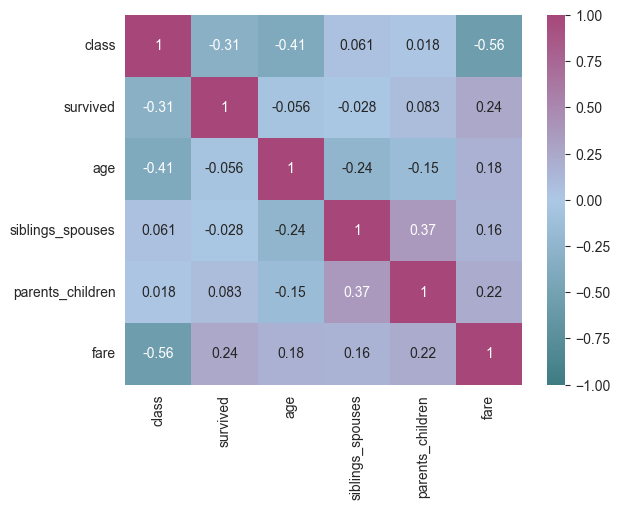

In [38]:
my_map = mpl.colors.LinearSegmentedColormap.from_list('', ['#A74779', '#ACC8E5', '#3E7C82']).reversed()
sns.heatmap(data=titanic_df.corr(), vmin=-1, vmax=1, cmap=my_map)